In [18]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx
import re
import matplotlib.pyplot as plt

In [6]:
# Load spacy English languague model
NER = spacy.load("en_core_web_sm")

# Load books as data

In [8]:
import os
 
# Get all book files in the data directory
all_books = [b for b in os.scandir('data') if '.txt' in b.name]

all_books

[<DirEntry '1 The Last Wish.txt'>,
 <DirEntry '2 The Sword of Destiny.txt'>,
 <DirEntry '3 Blood of Elves.txt'>,
 <DirEntry '4 Times of Contempt.txt'>,
 <DirEntry '5 Baptism of Fire.txt'>,
 <DirEntry '6 The Tower of the Swallow.txt'>,
 <DirEntry '7 The Lady of the Lake.txt'>,
 <DirEntry '8 something ends something begins.txt'>]

In [12]:
book = all_books[1]
book_text = open(book).read()
book_doc = NER(book_text)

In [13]:
# Visualize identified entities
displacy.render(book_doc[0:2000], style="ent", jupyter=True)

In [17]:
# Read characters
character_df = pd.read_csv("characters.csv")
character_df['character'].unique()

array(['Adalia', 'Adela', 'Aen Saevherne', 'Aevenien', 'Aglaïs',
       'Albrich', 'Amavet', 'Angus Bri Cri', 'Anna Kameny',
       'Anzelm Aubry', 'Artaud Terranova', 'Asse', 'Assire var Anahid',
       'Aubry (first born)', 'Augusta Wagner', 'Baron of Casadei',
       'Beatrix of Kovir', 'Bronik', 'Brouver Hoog',
       'Cahir Mawr Dyffryn aep Ceallach', 'Calanthe', 'Caleb Stratton',
       'Carduin', 'Ceallach aep Gruffyd', 'Cerro', 'Ciaran aep Dearbh',
       'Ciri', 'Cirilla Fiona (imposter)', 'Codringher',
       'Coinneach Dá Reo', 'Connor', 'Coram I', 'Coram II', 'Corbett',
       'Cosmo Baldenvegg', 'Count Lanier', 'Cregennan of Lod', 'Crispin',
       'Dagorad', 'Dandelion', 'Daniel Etcheverry', 'Demavend III',
       'Echel Traighlethan', 'Effenberg', 'Eithné', 'Elan Trahe',
       'Elen of Kaedwen', 'Emhyr var Emreis',
       'Emiel Regis Rohellec Terzieff-Godefroy', 'Ethain', 'Falka',
       'Falka (alias)', 'Fauve', 'Field Marshal Windbag',
       'Figgis Merluzzo', 'Fion

In [19]:
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[)]", "", x))
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ',1)[0])

In [20]:
character_df

,book,character,character_firstname
0,Category:Baptism of Fire characters,Adalia,Adalia
1,Category:Baptism of Fire characters,Adela,Adela
2,Category:Baptism of Fire characters,Aen Saevherne,Aen
3,Category:Baptism of Fire characters,Aevenien,Aevenien
4,Category:Baptism of Fire characters,Aglaïs,Aglaïs
...,...,...,...
1269,Category:Time of Contempt characters,Yanna of Murivel,Yanna
1270,Category:Time of Contempt characters,Yarpen Zigrin,Yarpen
1271,Category:Time of Contempt characters,Yennefer of Vengerberg,Yennefer
1272,Category:Time of Contempt characters,Yiolenta Suarez,Yiolenta


# Get named entity list per sentence

In [21]:
sent_entity_df = []
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence" : sent, "entities" : entity_list})
    
sent_entity_df=pd.DataFrame(sent_entity_df)

In [22]:
sent_entity_df

,sentence,entities
0,"(ï»¿The, Limits, of, the, Possible, \n, I, \n,...",[ï»¿The Limits of the Possible]
1,"("", It, 's, been, an, hour, and, a, quarter, s...",[an hour and a quarter]
2,"(He, 's, done, for, .)",[]
3,"("", \n, The, townsfolk, ,, huddled, together, ...",[]
4,"(A, fat, man, dressed, in, a, yellow, smock, \...",[]
...,...,...
11327,"("", \n, Yurga, saw, astonishment, in, the, eye...",[Yurga]
11328,"(He, heard, Chrysididae, 's, discreet, sobs, a...",[]
11329,"(He, knew, that, he, would, not, understand, t...",[]
11330,"(With, good, reason, :, \n, "", You, 're, more,...",[]


In [23]:
# Function to filter out non-character entities
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list 
            if ent in list(character_df.character) 
            or ent in list(character_df.character_firstname)]

In [24]:
filter_entity(["Geralt", "Thu", "2"], character_df)

['Geralt']

In [25]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

# Filter out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

,sentence,entities,character_entities
85,"(I, am, Geralt, of, Rivia, .)",[Geralt of Rivia],[Geralt of Rivia]
95,"(Is, there, anything, keeping, you, in, this, ...",[Geralt of Rivia],[Geralt of Rivia]
102,"("", \n, "", Borch, ,, "", replied, Geralt, ,, wh...","[Borch, Geralt]",[Geralt]
106,"("", \n, "", There, are, some, ,, "", Geralt, rep...",[Geralt],[Geralt]
110,"("", \n, Geralt, took, off, a, glove, and, shoo...",[Geralt],[Geralt]
140,"("", I, forgot, ,, "", Three, Jackdaws, winked, ...","[Three Jackdaws, Geralt]",[Geralt]
151,"(Geralt, loosened, his, belt, ,, removed, his,...",[Geralt],[Geralt]
157,"("", Do, the, girls, speak, the, common, langua...",[Geralt],[Geralt]
160,"(How, 's, your, soup, ,, Geralt, ?, "", \n, "", ...","[Geralt, Hmm]",[Geralt]
169,"(Yet, there, is, a, certain, principal, underl...",[Geralt],[Geralt]


In [27]:
# Take only first name of characters
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

C:\Users\8092\AppData\Local\Temp\ipykernel_13176\364234938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


In [28]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

,sentence,entities,character_entities
85,"(I, am, Geralt, of, Rivia, .)",[Geralt of Rivia],[Geralt]
95,"(Is, there, anything, keeping, you, in, this, ...",[Geralt of Rivia],[Geralt]
102,"("", \n, "", Borch, ,, "", replied, Geralt, ,, wh...","[Borch, Geralt]",[Geralt]
106,"("", \n, "", There, are, some, ,, "", Geralt, rep...",[Geralt],[Geralt]
110,"("", \n, Geralt, took, off, a, glove, and, shoo...",[Geralt],[Geralt]
...,...,...,...
11314,"(He, only, saw, black, -, gloved, hands, squee...",[Ciri],[Ciri]
11316,"(Oh, ,, Geralt, !)",[Geralt],[Geralt]
11321,"(Say, it, ,, Geralt, !)",[Geralt],[Geralt]
11322,"(Forever, !, Say, it, !, "", \n, "", Forever, ,,...","[Forever, Ciri, Geralt]","[Ciri, Geralt]"


In [29]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [30]:
relationship_df = pd.DataFrame(relationships)

In [31]:
pd.set_option('display.max_rows', None)
relationship_df

,source,target
0,Geralt,Niedamir
1,Geralt,Niedamir
2,Geralt,Niedamir
3,Niedamir,Geralt
4,Niedamir,Geralt
5,Niedamir,Geralt
6,Geralt,Niedamir
7,Geralt,Niedamir
8,Niedamir,Geralt
9,Niedamir,Geralt


In [32]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [33]:
relationship_df.head(10)

,source,target,value
0,Geralt,Niedamir,34
1,Niedamir,Geralt,18
2,Geralt,Eyck,26
3,Eyck,Geralt,25
4,Geralt,Dorregaray,15
5,Dorregaray,Yennefer,9
6,Yennefer,Dorregaray,35
7,Dorregaray,Geralt,15
8,Geralt,Yarpen,17
9,Gyllenstiern,Geralt,18


In [34]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

# Graph visualization - Networkx

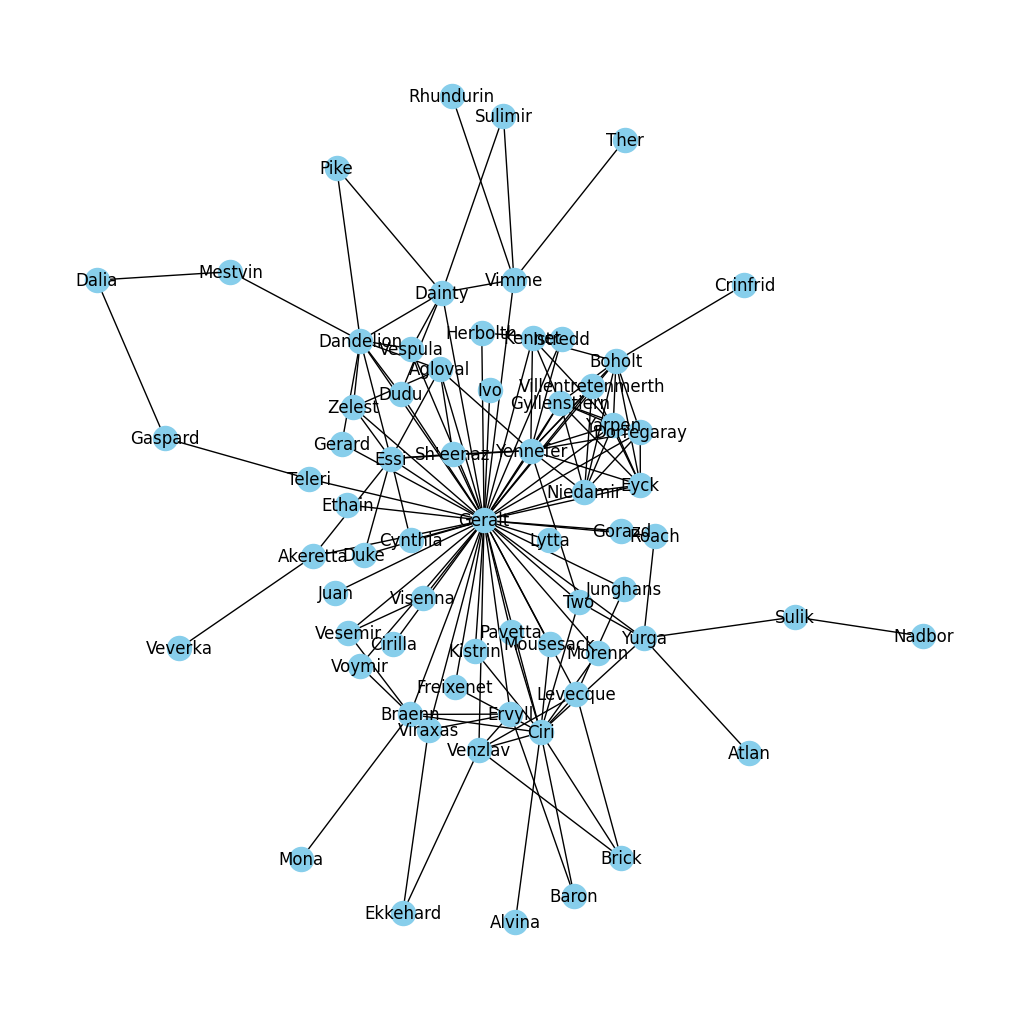

In [36]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

# Graph visualization - Pyvis

In [37]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("witcher.html")

witcher.html


# The most important characters in The Witcher

In [38]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Geralt': 0.7424242424242424,
 'Niedamir': 0.12121212121212122,
 'Eyck': 0.12121212121212122,
 'Dorregaray': 0.09090909090909091,
 'Yennefer': 0.21212121212121213,
 'Yarpen': 0.10606060606060606,
 'Gyllenstiern': 0.12121212121212122,
 'Boholt': 0.13636363636363635,
 'Kennet': 0.07575757575757576,
 'Crinfrid': 0.015151515151515152,
 'Villentretenmerth': 0.06060606060606061,
 'Istredd': 0.045454545454545456,
 'Herbolth': 0.030303030303030304,
 'Ivo': 0.015151515151515152,
 'Two': 0.06060606060606061,
 'Pike': 0.030303030303030304,
 'Dandelion': 0.15151515151515152,
 'Dainty': 0.10606060606060606,
 'Vespula': 0.045454545454545456,
 'Vimme': 0.07575757575757576,
 'Sulimir': 0.030303030303030304,
 'Ther': 0.015151515151515152,
 'Rhundurin': 0.015151515151515152,
 'Dudu': 0.045454545454545456,
 "Sh'eenaz": 0.06060606060606061,
 'Agloval': 0.09090909090909091,
 'Teleri': 0.030303030303030304,
 'Gaspard': 0.030303030303030304,
 'Dalia': 0.030303030303030304,
 'Mestvin': 0.030303030303030304,


<Axes: >

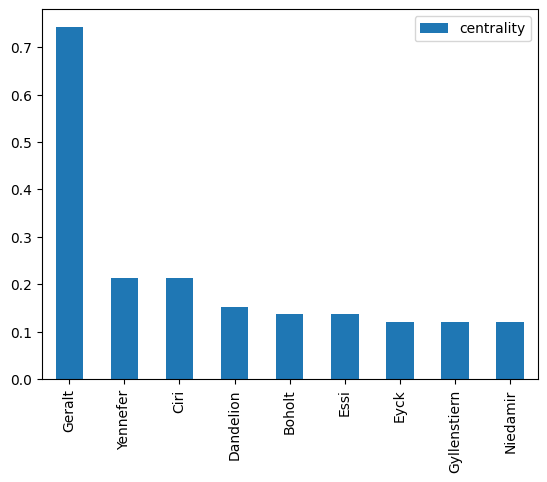

In [39]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

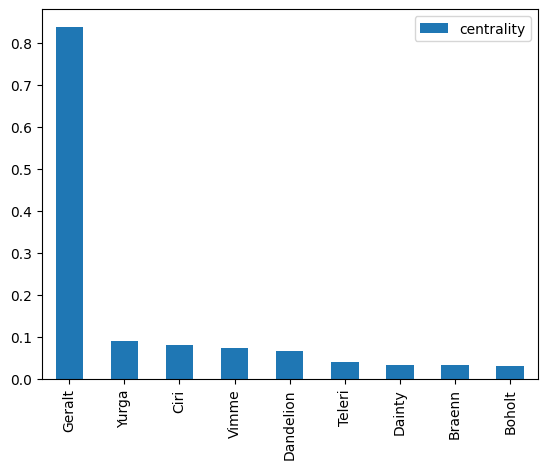

In [40]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

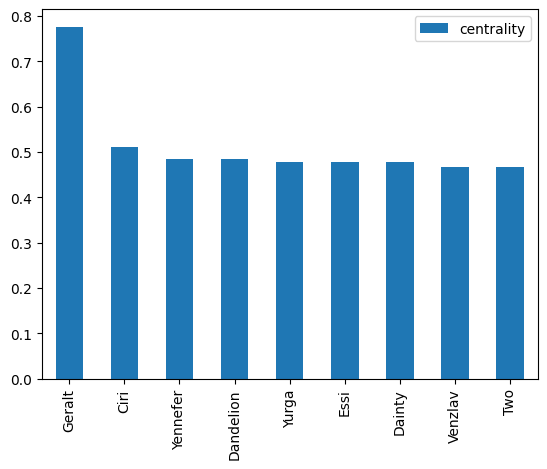

In [41]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [42]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

# Community detection

In [44]:
import community as community_louvain

In [45]:
communities = community_louvain.best_partition(G)

In [46]:
communities

{'Geralt': 6,
 'Niedamir': 1,
 'Eyck': 1,
 'Dorregaray': 1,
 'Yennefer': 1,
 'Yarpen': 1,
 'Gyllenstiern': 1,
 'Boholt': 1,
 'Kennet': 1,
 'Crinfrid': 1,
 'Villentretenmerth': 1,
 'Istredd': 6,
 'Herbolth': 6,
 'Ivo': 6,
 'Two': 3,
 'Pike': 5,
 'Dandelion': 5,
 'Dainty': 5,
 'Vespula': 5,
 'Vimme': 5,
 'Sulimir': 5,
 'Ther': 5,
 'Rhundurin': 5,
 'Dudu': 5,
 "Sh'eenaz": 2,
 'Agloval': 2,
 'Teleri': 0,
 'Gaspard': 0,
 'Dalia': 0,
 'Mestvin': 0,
 'Essi': 2,
 'Gerard': 5,
 'Zelest': 2,
 'Duke': 2,
 'Veverka': 2,
 'Akeretta': 2,
 'Ethain': 6,
 'Juan': 6,
 'Cynthia': 2,
 'Ciri': 4,
 'Braenn': 6,
 'Ervyll': 4,
 'Voymir': 6,
 'Kistrin': 4,
 'Alvina': 4,
 'Vesemir': 6,
 'Cirilla': 6,
 'Freixenet': 4,
 'Venzlav': 4,
 'Ekkehard': 4,
 'Viraxas': 4,
 'Morenn': 4,
 'Mona': 6,
 'Pavetta': 4,
 'Baron': 4,
 'Junghans': 4,
 'Brick': 4,
 'Levecque': 4,
 'Mousesack': 4,
 'Yurga': 3,
 'Visenna': 6,
 'Atlan': 3,
 'Lytta': 6,
 'Gorazd': 6,
 'Roach': 3,
 'Nadbor': 3,
 'Sulik': 3}

In [47]:
nx.set_node_attributes(G, communities, 'group')

In [48]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("witcher_communities.html")

witcher_communities.html


# Evolution of characters' importance

In [50]:
from lib.utils.functions import *

In [51]:
# Initialize empty list for graphs from books
books_graph = []
all_books = [b for b in os.scandir('data') if '.txt' in b.name]
# Load spacy English languague model
nlp = spacy.load("en_core_web_sm")

# Sort dir entries by name
all_books.sort(key=lambda x: x.name)

In [52]:
# Loop through book list and create graphs
for book in all_books:
    book_text = ner(book)
    
    # Get list of entities per sentences
    sent_entity_df = get_ne_list_per_sentence(book_text)
    
    # Select only character entities
    sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

    # Filter out sentences that don't have any character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
    
    # Take only first name of characters
    sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

    # Create relationship df
    relationship_df = create_relationships(df = sent_entity_df_filtered, window_size = 5)                                                                                                               
    
    # Create a graph from a pandas dataframe
    G = nx.from_pandas_edgelist(relationship_df, 
                                source = "source", 
                                target = "target", 
                                edge_attr = "value", 
                                create_using = nx.Graph())     
    
    books_graph.append(G) 

C:\Users\8092\AppData\Local\Temp\ipykernel_13176\4223697425.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
C:\Users\8092\AppData\Local\Temp\ipykernel_13176\4223697425.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
C:\Users\8092\AppData\Local\Temp

<Axes: >

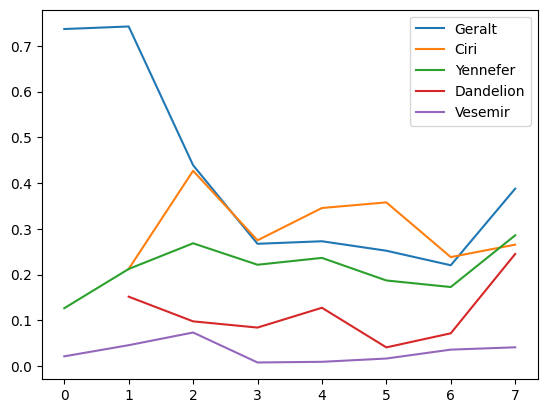

In [53]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books_graph]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of 5 main characters
degree_evol_df[["Geralt", "Ciri", "Yennefer", "Dandelion", "Vesemir"]].plot()